## 1st Class: Hyperparameters, overfit and Copy 5 otimization 

> Date: July 3, 2020


**Overfit:** When the model is so well trained that all different data into the test is out of the sitations that it's able to predict and "understand". The model is good only with the train data and cases very very similar to them.

### Importing the dataset

> Yes, is the same of the used on the previous course [model validation](http://localhost:8888/notebooks/6_model_validation/model_validation.ipynb) 

In [4]:
import pandas as pd
from datetime import datetime

uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
data = pd.read_csv(uri)

sold_change = {
    'yes' : 1,
    'no'  : 0
}

current_year = datetime.today().year
data['model_age'] = current_year - data.model_year 
data['km_per_year'] = data.mileage_per_year * 1.60934 
data.sold = data.sold.map(sold_change)
data = data.drop(columns = ['Unnamed: 0', 'mileage_per_year', 'model_year'], axis=1) # Axis: 1 - Column, 0 - Row
data.head()

,price,sold,model_age,km_per_year
0,30941.02,1,20,35085.22134
1,40557.96,1,22,12622.05362
2,89627.50,0,14,11440.79806
3,95276.14,0,5,43167.32682
4,117384.68,1,6,12770.11290


### Loading the previus project

In [58]:
def print_results(result):
    print('Raw result: ', result)
    print('\n----------------------------------------------------------------------------\nTest Score mean: %.2f%% ' % (result['test_score'].mean() * 100))
    accuracy_mean = result['test_score'].mean()
    accuracy_std = result['test_score'].std()
    print('Test accuracy gap: [%.2f%% - %.2f%%]' % (100 * (accuracy_mean - (2 * accuracy_std)), 100 * (accuracy_mean + (2 * accuracy_std))))

#### Modeling the data

In [16]:
sorted_data = data.sort_values('sold')
x = sorted_data[['model_age', 'price', 'km_per_year']]
y = sorted_data['sold']

#### Using Dummy Classifier

In [18]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_validate
import numpy as np

SEED = 15
np.random.seed(SEED)

# Baseline (default - stratified)
dummy = DummyClassifier()
result = cross_validate(dummy, x, y, cv = 10)
print_results(result)

Raw result:  {'fit_time': array([0.00306606, 0.00312996, 0.00349808, 0.00292039, 0.00364828,
       0.00610805, 0.00272369, 0.00392246, 0.00149846, 0.00139689]), 'score_time': array([0.00123787, 0.0012877 , 0.00134706, 0.00112987, 0.00157809,
       0.00111699, 0.00100398, 0.00059175, 0.00052619, 0.00057888]), 'test_score': array([0.526, 0.537, 0.49 , 0.505, 0.512, 0.506, 0.515, 0.521, 0.506,
       0.54 ])}

----------------------------------------------------------------------------
Test Score mean: 51.58% 
Test accuracy gap: [48.64% - 54.52%]


#### Using Decision Tree Classifier

In [20]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth = 2)
result = cross_validate(tree_model, x, y, cv = 10)
print_results(result)

Raw result:  {'fit_time': array([0.00960946, 0.0070653 , 0.00683808, 0.00703764, 0.0068171 ,
       0.00715113, 0.00714111, 0.00701785, 0.00683689, 0.00701761]), 'score_time': array([0.00126052, 0.00139594, 0.00107574, 0.0012331 , 0.00107002,
       0.00123453, 0.00127435, 0.00117493, 0.00106907, 0.00116849]), 'test_score': array([0.744, 0.759, 0.763, 0.765, 0.754, 0.742, 0.771, 0.748, 0.764,
       0.768])}

----------------------------------------------------------------------------
Test Score mean: 75.78% 
Test accuracy gap: [73.83% - 77.73%]


In [23]:
random_model = np.random.randint(-2, 3, size = len(data))
data['random_model'] = random_model + data['model_age']
print(data['random_model'].min())
data.head()

1


,price,sold,model_age,km_per_year,random_model
0,30941.02,1,20,35085.22134,18
1,40557.96,1,22,12622.05362,22
2,89627.50,0,14,11440.79806,14
3,95276.14,0,5,43167.32682,6
4,117384.68,1,6,12770.11290,8


#### Using SVC

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

scaler = StandardScaler()
model = SVC()
pipeline = Pipeline([('StandardScaler', scaler), ('SVC', model)])

cross_val = GroupKFold(n_splits = 10)
result = cross_validate(pipeline, x, y, cv = cross_val, groups = data.random_model)
print_results(result)

Raw result:  {'fit_time': array([2.30803633, 2.38906527, 2.60944319, 2.6984601 , 2.69927049,
       3.01723361, 2.56318426, 2.36814046, 2.36911297, 2.54103827]), 'score_time': array([0.13893342, 0.13995004, 0.15031862, 0.14161873, 0.26028728,
       0.16876793, 0.1393342 , 0.1391747 , 0.14026737, 0.15070081]), 'test_score': array([0.76247505, 0.78169014, 0.76458753, 0.77128713, 0.73307164,
       0.7602459 , 0.77402863, 0.7754065 , 0.75955734, 0.78169685])}

----------------------------------------------------------------------------
Test Score mean: 76.64% 
Test accuracy gap: [73.92% - 79.36%]


### Understanding what is `max_depth`  in Decision Tree Classifiers

In [28]:
# Install graphviz
# Import export_graphviz 
# Import graphviz
# Fit the model
# Use export graph viz with model, out_file (None), filled (True), rounded (True), 
# class_names (names to the possible results) and features names (columns of x)
# Define the graph with graphviz.source
# Run tree classifier with 2, 3 and 10 levels and verify the results

In [34]:
tree_model = DecisionTreeClassifier(max_depth = 2)
result = cross_validate(tree_model, x, y, cv = 10)
print_results(result)
tree_model.fit(x, y)

Raw result:  {'fit_time': array([0.01358342, 0.01353145, 0.01238847, 0.01262832, 0.01039433,
       0.00842381, 0.00854683, 0.00833201, 0.00831747, 0.00829625]), 'score_time': array([0.0027895 , 0.00307536, 0.00141764, 0.00136995, 0.00161099,
       0.00145102, 0.00133896, 0.00133634, 0.00130033, 0.00129271]), 'test_score': array([0.744, 0.759, 0.763, 0.765, 0.754, 0.742, 0.771, 0.748, 0.764,
       0.768])}

----------------------------------------------------------------------------
Test Score mean: 75.78% 
Test accuracy gap: [73.83% - 77.73%]


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Raw result:  {'fit_time': array([0.01265335, 0.01345611, 0.00900292, 0.00958562, 0.00854659,
       0.00884366, 0.00845647, 0.00840449, 0.00831723, 0.00832629]), 'score_time': array([0.0035553 , 0.00158381, 0.00182009, 0.00137258, 0.00151467,
       0.00161934, 0.00135446, 0.00133991, 0.00135255, 0.00135946]), 'test_score': array([0.744, 0.759, 0.763, 0.765, 0.754, 0.742, 0.771, 0.748, 0.764,
       0.768])}

----------------------------------------------------------------------------
Test Score mean: 75.78% 
Test accuracy gap: [73.83% - 77.73%]


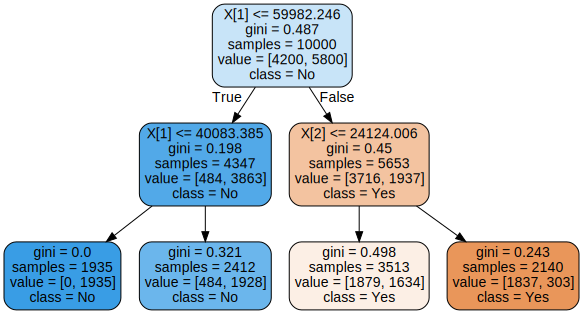

In [44]:
from sklearn.tree import export_graphviz
import graphviz

tree_model = DecisionTreeClassifier(max_depth = 2)
result = cross_validate(tree_model, x, y, cv = 10)
print_results(result)
tree_model.fit(x, y)

exp_graph = export_graphviz(tree_model, filled = True, 
               rounded = True, class_names = ['Yes', 'No'])
graphviz.Source(exp_graph)

Raw result:  {'fit_time': array([0.02093172, 0.01793027, 0.01544404, 0.01475763, 0.01419759,
       0.01426172, 0.01452518, 0.01427054, 0.0142405 , 0.0141573 ]), 'score_time': array([0.0033412 , 0.00247025, 0.00155282, 0.00147486, 0.00136209,
       0.00137138, 0.00135708, 0.0013535 , 0.00136328, 0.00134611]), 'test_score': array([0.781, 0.807, 0.783, 0.787, 0.774, 0.761, 0.813, 0.782, 0.774,
       0.793])}

----------------------------------------------------------------------------
Test Score mean: 78.55% 
Test accuracy gap: [75.60% - 81.50%]


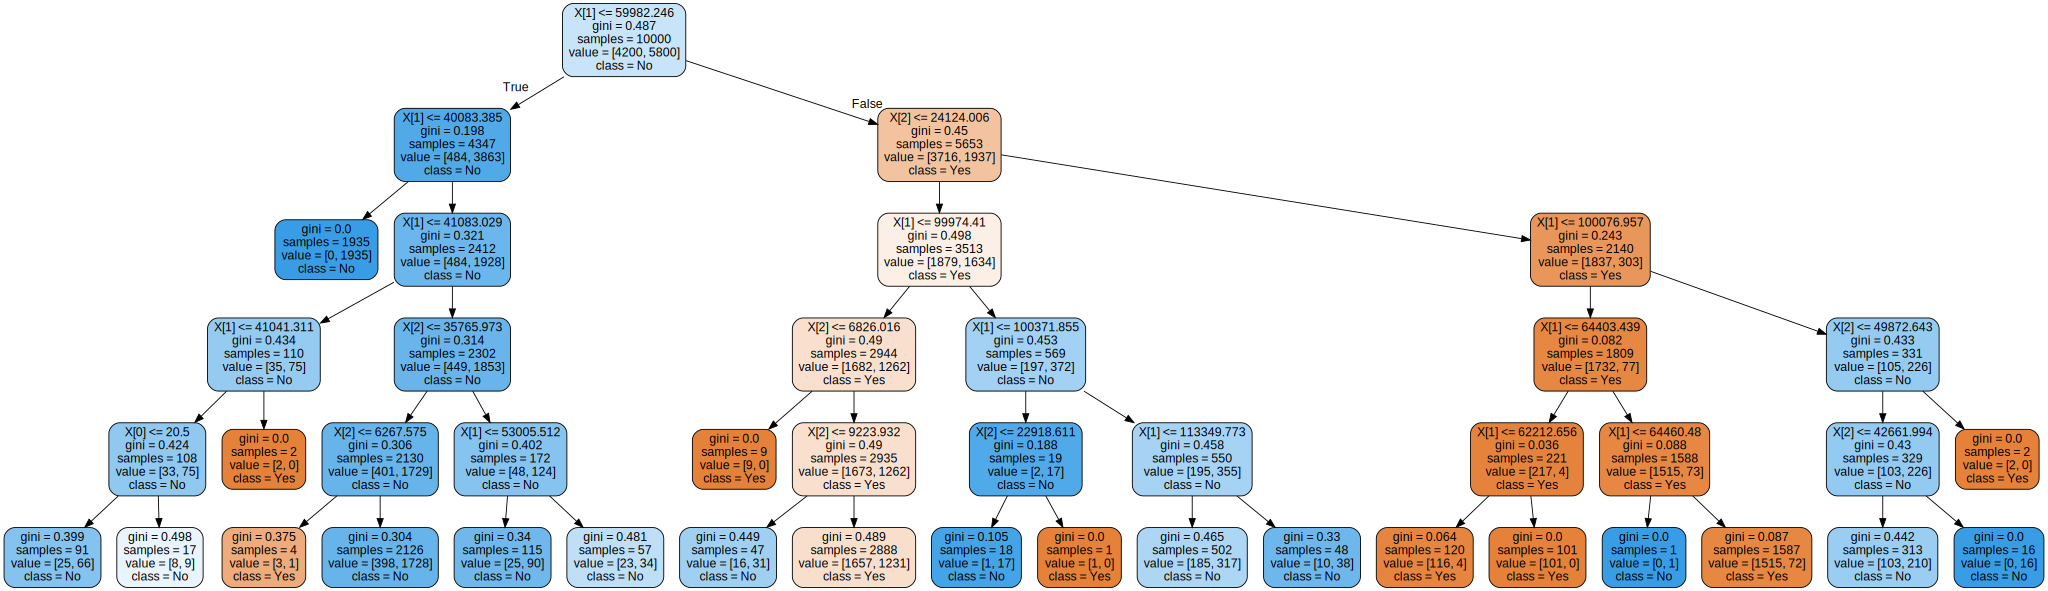

In [47]:
tree_model = DecisionTreeClassifier(max_depth = 5)
result = cross_validate(tree_model, x, y, cv = 10)
print_results(result)
tree_model.fit(x, y)

exp_graph = export_graphviz(tree_model, filled = True, 
               rounded = True, class_names = ['Yes', 'No'])
graphviz.Source(exp_graph)

Raw result:  {'fit_time': array([0.01919651, 0.01320195, 0.01130009, 0.01080632, 0.01078773,
       0.010571  , 0.01030278, 0.01050162, 0.01045275, 0.01068044]), 'score_time': array([0.00178266, 0.001688  , 0.00166106, 0.00154829, 0.0016706 ,
       0.00134921, 0.00132036, 0.00134325, 0.00133681, 0.00132775]), 'test_score': array([0.786, 0.804, 0.786, 0.79 , 0.778, 0.759, 0.812, 0.782, 0.777,
       0.796])}

----------------------------------------------------------------------------
Test Score mean: 78.70% 
Test accuracy gap: [75.87% - 81.53%]


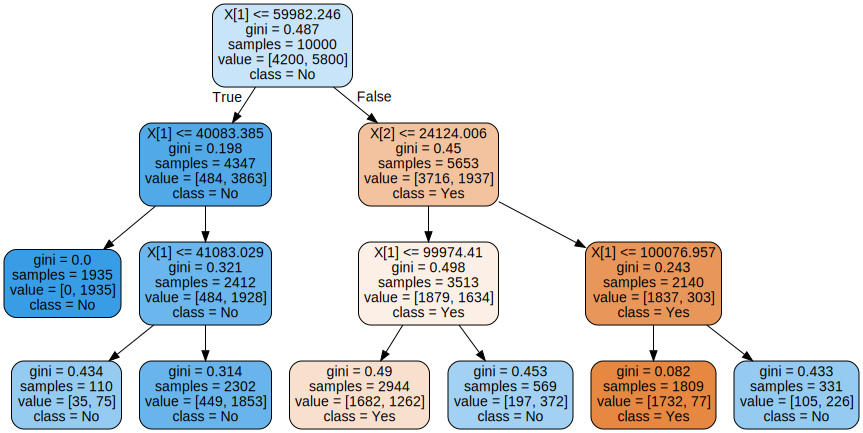

In [45]:
tree_model = DecisionTreeClassifier(max_depth = 3)
result = cross_validate(tree_model, x, y, cv = 10)
print_results(result)
tree_model.fit(x, y)

exp_graph = export_graphviz(tree_model, filled = True, 
               rounded = True, class_names = ['Yes', 'No'])
graphviz.Source(exp_graph)

**Hyperparameters:** Parameters handed out to the model before the fit 

> Example: `max_deep`

In [49]:
# Define a function to run the tree classifier with all values less than or equal as a parameter. 
# Print results for all values
# Choose the best option
# Verify the results remembering the concept of overfit

### Printing and analysing results

In [103]:
def simplified_print_results(result):
    test_accuracy_mean = result['test_score'].mean()
    train_accuracy_mean = result['train_score'].mean()
    print('mean (train): %.4f%%  mean (test): %.4f%%' % (train_accuracy_mean * 100, test_accuracy_mean * 100))

In [104]:
def tree_decision(max_depth = 3, print_results = False):
    SEED = 20
    np.random.seed(SEED)
    
    tree_model = DecisionTreeClassifier(max_depth = max_depth)
    result = cross_validate(tree_model, x, y, cv = 10, return_train_score = True)
    
    test_score = result['test_score'].mean()
    train_score = result['train_score'].mean()
    table = [max_depth, train_score, test_score]
    
    if(print_results):
        print('Depth: ', max_depth)
        print('mean (train): %.4f%%  mean (test): %.4f%%' % (train_score * 100, test_score * 100))
    
    return table

In [105]:
max_depth = 30
results = [tree_decision(max_depth = depth) for depth in range(1, max_depth + 1)]

> The best choose, in this case, is `max_depth = 3`

> This is an example of *overfitting*, where the model is excelent with train data but is much worse with test data

In [106]:
df_results = pd.DataFrame(results, columns = ['max_depth', 'train_score', 'test_score'])
df_results

,max_depth,train_score,test_score
0,1,0.757911,0.7578
1,2,0.757911,0.7578
2,3,0.787544,0.7870
3,4,0.788000,0.7862
4,5,0.789656,0.7855
5,6,0.791889,0.7849
6,7,0.794422,0.7806
7,8,0.798089,0.7782
8,9,0.803622,0.7761
9,10,0.809911,0.7688


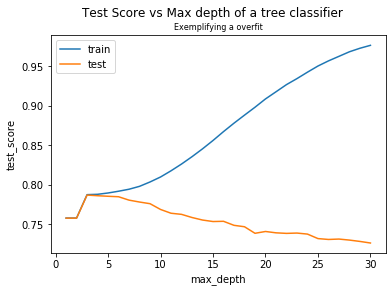

In [123]:
from seaborn import lineplot
import matplotlib.pyplot as plt

lineplot(x = 'max_depth', y = 'train_score', data = df_results)
lineplot(x = 'max_depth', y = 'test_score', data = df_results)
plt.title('Exemplifying a overfit', size = 8)
plt.suptitle('Test Score vs Max depth of a tree classifier')
plt.legend(['train', 'test'])